# 2.1. Problem Statement: Machine Learning 1

#### 1. What are the three stages to build the hypotheses or model in machine learning?

a) Model building

b) Model testing

c) Applying the model

#### 2. What is the standard approach to supervised learning?

The standard approach to supervised learning is to split the set of example into the training set and the test.

#### 3. What is Training set and Test set?

In various areas of information science like machine learning, a set of data is used to discover the potentially predictive relationship known as ‘Training Set’. Training set is an examples given to the learner, while Test set is used to test the accuracy of the hypotheses generated by the learner, and it is the set of example held back from the learner. Training set are distinct from Test set.

#### 4. What is the general principle of an ensemble method and what is bagging and boosting in ensemble method?

The general principle of an ensemble method is to combine the predictions of several models built with a given learning algorithm in order to improve robustness over a single model.

Bagging is a way to decrease the variance in the prediction by generating additional data for training from dataset using combinations with repetitions to produce multi-sets of the original data. Boosting is an iterative technique which adjusts the weight of an observation based on the last classification.

#### 5. How can you avoid overfitting?

Below are the most popular solutions for overfitting:
    1. Cross-validation
    2. Train with more data
    3. Remove irrelevant features
    4. Regularization
    5. Ensembling

# 2.2. Problem Statement: Machine Learning 2

#### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import boston dataset
from sklearn.datasets import load_boston 
boston = load_boston()

In [3]:
#Print the keys of dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
#Describe the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
bos['MEDV'] = boston.target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Data Preprocessing 
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

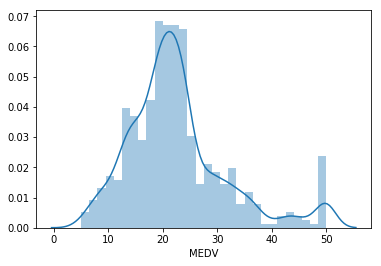

In [9]:
#Exploratory Data Analysis
#Plot the distribution of the target variable MEDV
sns.distplot(bos['MEDV'], bins=30)
plt.show()

In [10]:
X = bos.iloc[:,:-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y = bos.iloc[:,-1:]
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
# splitting data to training and testing dataset.  
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [13]:
# Fitting Multi Linear regression model to training dataset 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# predicting the test set results 
y_pred = regressor.predict(X_test)

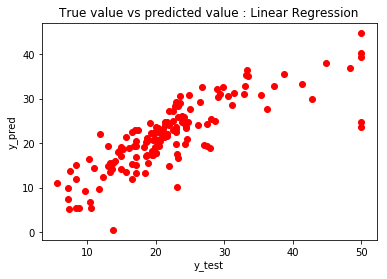

In [15]:
# Plotting Scatter graph to show the prediction  
# results - 'ytrue' value vs 'y_pred' value 
plt.scatter(y_test, y_pred, c = 'red')
plt.xlabel("y_test") 
plt.ylabel("y_pred") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

In [16]:
# Results of Linear Regression. 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("Mean Square Error : ", mse)
print("Root Mean Square Error : ", rmse) 

Mean Square Error :  27.19596576688338
Root Mean Square Error :  5.21497514537542


As per the result our model is only 72.81% accurate. So, the prepared model is not very good for predicting the housing prices.

# 2.3. Problem Statement: Machine Learning 3

#### I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman. 
 
#### Dataset 
 
#### The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

In [17]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [18]:
# Load dataset
import statsmodels.api as sm
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int) 
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [19]:
# Data Exploration
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can see that on average, women who have affairs rate their marriages lower, which is to be expected. 

In [20]:
# Let's take another look at the rate_marriage variable.

dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


It seems an increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

Text(0, 0.5, 'Frequency')

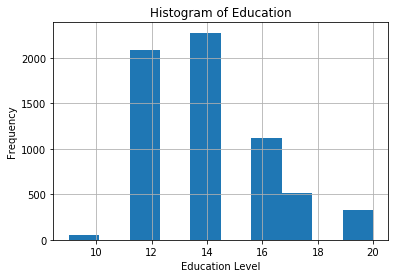

In [21]:
#Data Visualization
#Histogram of Education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

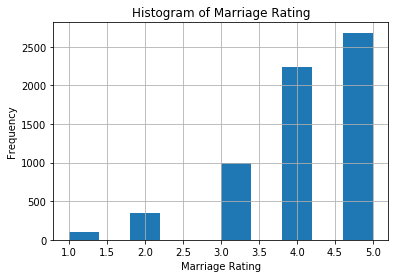

In [22]:
#Histogram of Education
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

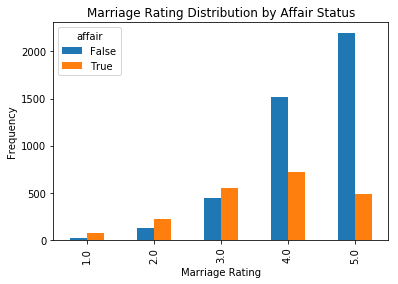

In [23]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [24]:
from patsy import dmatrices
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [25]:
# rename columns of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [26]:
# flatten y into a 1-D array
y = np.ravel(y)

In [27]:
# instantiate a logistic regression model, and fit with X and y
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X, y)

# check the accuracy on the training set
classifier.score(X, y)

C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

Our Model is 73% acuarte.

In [28]:
#what percentage had affairs?
y.mean()

0.3224945020420987

Only 32% of the women had affairs.

In [29]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(classifier.coef_)))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_husb_2,[0.1906359445867889]
7,occ_husb_3,[0.2978327129263421]
8,occ_husb_4,[0.1614088540760616]
9,occ_husb_5,[0.18777091388972483]


From the above output we can say-Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 

# 2.4. Problem Statement: Machine Learning 4

#### Predicting Survival in the Titanic Data Set 

#### We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [30]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [31]:
#import titanic dataset
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

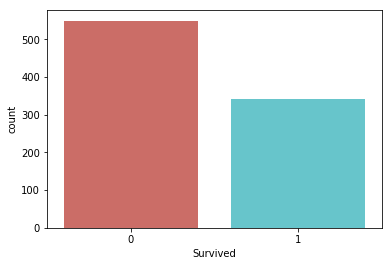

In [33]:
sns.countplot(x='Survived',data=titanic, palette='hls')

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#Data Preprocessing

#Removing the unnecessary features
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],1)

# Filling missing Age values with median
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

# Impute the Embarked variable
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [37]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
#label encoding
titanic_data = titanic.copy()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder() #calling the class
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

In [39]:
#onehot encoding
Embarked_dummies = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
titanic_data = pd.concat([titanic_data, Embarked_dummies], axis=1)
titanic_data = titanic_data.drop('Embarked',axis = 1)

In [40]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [41]:
X = titanic_data.iloc[:,1:].values
y = titanic_data.iloc[:,:1].values
y = np.ravel(y)

In [42]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [43]:
# Fitting Decision Tree Classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [44]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [45]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[137,  31],
       [ 31,  69]], dtype=int64)

In [46]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.69      0.69      0.69       100

   micro avg       0.77      0.77      0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



# 2.5. Problem Statement: Machine Learning 5 

#### In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set. 

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [48]:
#import boston dataset
from sklearn.datasets import load_boston 
boston = load_boston()

In [49]:
#Print the keys of dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [50]:
#Describe the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
features = pd.DataFrame(boston.data, columns=boston.feature_names) 

In [52]:
targets = boston.target

In [53]:
#Data Preprocessing 
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

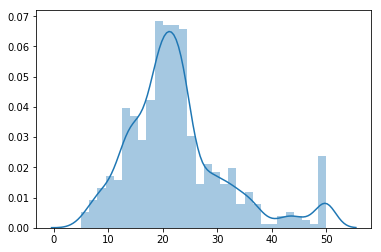

In [54]:
#Exploratory Data Analysis
#Plot the distribution of the target variable MEDV
sns.distplot(targets, bins=30)
plt.show()

In [55]:
X = features.copy()
y = targets.copy()

In [56]:
# splitting data to training and testing dataset.  
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [57]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [58]:
# Fitting the Random Forest Regression to dataset(with 100 trees)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
#Predicted Value
y_pred = regressor.predict(X_test)

In [60]:
regressor.score(X_train,y_train)

0.9836095677297585

In [61]:
targets.mean()

22.532806324110677

In [62]:
# Model Evaluation
#find out r-squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print("R2 Score : ",r2_score)
# find out mean suqred error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("Mean Square Error : ", mse)
print("Root Mean Square Error : ", rmse) 

R2 Score :  0.8270857676750367
Mean Square Error :  14.397790296052637
Root Mean Square Error :  3.7944420269721655


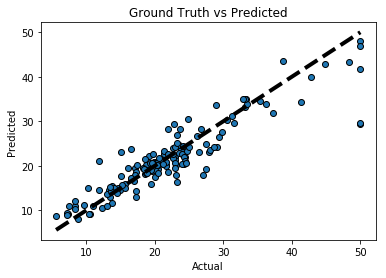

In [63]:
#Visualize goodness of fit
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ground Truth vs Predicted")
plt.show()

# 2.6. Problem Statement: Machine Learning 6

#### In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. 

In [64]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [65]:
train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [66]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels              

In [67]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [68]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [69]:
#identify the missing values
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [70]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [71]:
#Removing the unknown values from dataset
train_nomissing = train_set.replace(to_replace = ' ?',value = np.NaN)
test_nomissing = test_set.replace(to_replace = ' ?',value = np.NaN)

In [72]:
#Match the target income thresholds in train and test set
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [73]:
#Checking the unique values to see whether the thresholds match now
print(train_nomissing.wage_class.unique())
print(train_nomissing.wage_class.unique())

[' <=50K' ' >50K']
[' <=50K' ' >50K']


In [74]:
#Combine train and test set
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0)

In [75]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    47985 non-null object
wage_class        48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [76]:
#Encode the categorical columns
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [77]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null int8
fnlwgt            48842 non-null int64
education         48842 non-null int8
education_num     48842 non-null int64
marital_status    48842 non-null int8
occupation        48842 non-null int8
relationship      48842 non-null int8
race              48842 non-null int8
sex               48842 non-null int8
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null int8
wage_class        48842 non-null int8
dtypes: int64(6), int8(9)
memory usage: 3.0 MB


In [78]:
combined_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [79]:
X = combined_set.iloc[:,:-1].values
y = combined_set.iloc[:,-1:].values
y = np.ravel(y)

In [80]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [81]:
#Fitting XGBoost to training set
from xgboost import XGBClassifier
classifier = XGBClassifier() #We are gonna use the default parameter
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [82]:
#Prediction
y_pred=classifier.predict(X_test)

In [83]:
#Making confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10644,   556],
       [ 1435,  2018]], dtype=int64)

In [84]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11200
           1       0.78      0.58      0.67      3453

   micro avg       0.86      0.86      0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.86      0.86      0.86     14653



In [85]:
#Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,y = y_train, cv = 10)
accuracies

array([0.8625731 , 0.86491228, 0.86695906, 0.86812865, 0.86282539,
       0.86307782, 0.86190755, 0.87156232, 0.86190755, 0.85810415])

In [86]:
accuracies.mean()

0.8641957878412413

Our model is 86.41% accurate.